In [1]:
pip install plotly==5.6.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime

In [3]:
listOfCoins = ["Bitcoin","Cardano","Ethereum","Monero","Solana","XRP"]
TotalCoins = 0
dictCoin = dict()
counter=0

#Opering a few files in json
for coins in listOfCoins:
    print(coins)
    counter = counter + 1

with open("./Bitcoin.json") as file:
    BitcoinData = json.load(file)
with open("./Cardano.json") as file:
    CardanoData = json.load(file)
with open("./Ethereum.json") as file:
    EthereumData = json.load(file)
with open("./Monero.json") as file:
    MoneroData = json.load(file)
with open("./Solana.json") as file:
    SolanaData = json.load(file)
with open("./XRP.json") as file:
    XRPData = json.load(file)
    
Bitcoin = "BitcoinCSV.csv"
Cardano = "CardanoCSV.csv"
Ethereum = "EthereumCSV.csv"
Monero ="MoneroCSV.csv"
Solana = "SolanaCSV.csv"
XRP = "XRPCSV.csv"

CoinlistData = [BitcoinData,CardanoData,EthereumData,MoneroData,SolanaData,XRPData]
CoinlistCSV = [Bitcoin,Cardano,Ethereum,Monero,Solana,XRP]

#writing to desiring csv format for ploting later on
counter = 0
for coinName in CoinlistCSV:
    with open(coinName, "w") as file:
        csv_file = csv.writer(file)
        csv_file.writerow(["timeOpen","open",])
        for item in CoinlistData[counter]["quotes"]:
            csv_file.writerow([item['timeOpen'],item['quote']['open']])
        counter=counter+1
print("finished")



Bitcoin
Cardano
Ethereum
Monero
Solana
XRP
finished


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

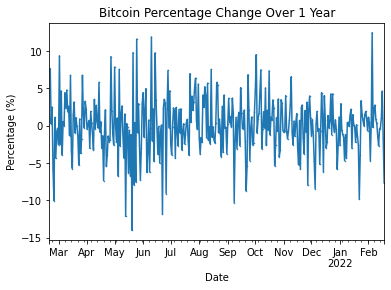

In [64]:
#Bitcoin Chart and percent change
BitcoinPD=pd.read_csv(Bitcoin, parse_dates=['timeOpen'], index_col=['timeOpen'])
BitcoinPD["PercentChange"]=BitcoinPD["open"]
BitcoinPD.PercentChange=BitcoinPD.PercentChange.pct_change()*100
ax=BitcoinPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Bitcoin Percentage Change Over 1 Year')
ax.set(xlabel='Date', ylabel='Percentage (%)')


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

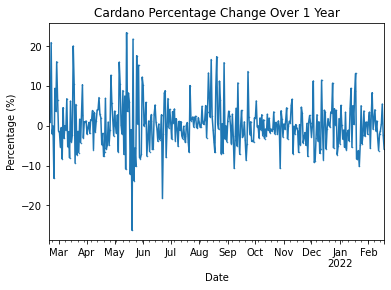

In [5]:
#Cardano Chart and percent change
CardanoPD=pd.read_csv(Cardano, parse_dates=['timeOpen'], index_col=['timeOpen'])
CardanoPD["PercentChange"]=CardanoPD["open"]
CardanoPD.PercentChange=CardanoPD.PercentChange.pct_change()*100
ax=CardanoPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Cardano Percentage Change Over 1 Year')
ax.set(xlabel='Date', ylabel='Percentage (%)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

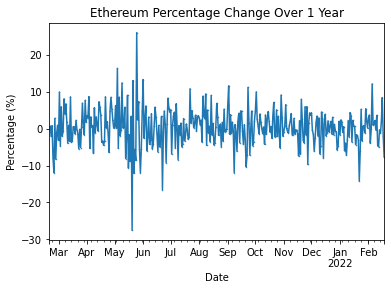

In [60]:
#Ethereum Chart and percent change
EthereumPD=pd.read_csv(Ethereum, parse_dates=['timeOpen'], index_col=['timeOpen'])
EthereumPD["PercentChange"]=EthereumPD["open"]
EthereumPD.PercentChange=EthereumPD.PercentChange.pct_change()*100
bx=EthereumPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Ethereum Percentage Change Over 1 Year')
bx.set(xlabel='Date', ylabel='Percentage (%)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

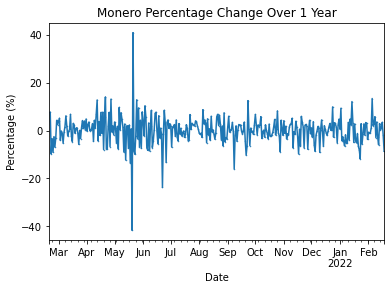

In [61]:
#Monero Chart and percent change
MoneroPD=pd.read_csv(Monero, parse_dates=['timeOpen'], index_col=['timeOpen'])
MoneroPD["PercentChange"]=MoneroPD["open"]
MoneroPD.PercentChange=MoneroPD.PercentChange.pct_change()*100
cx=MoneroPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Monero Percentage Change Over 1 Year')
cx.set(xlabel='Date', ylabel='Percentage (%)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

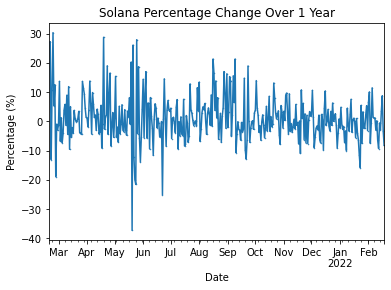

In [62]:
#Solana Chart and percent change
SolanaPD=pd.read_csv(Solana, parse_dates=['timeOpen'], index_col=['timeOpen'])
SolanaPD["PercentChange"]=SolanaPD["open"]
SolanaPD.PercentChange=SolanaPD.PercentChange.pct_change()*100
dx=SolanaPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='Solana Percentage Change Over 1 Year')
dx.set(xlabel='Date', ylabel='Percentage (%)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Percentage (%)')]

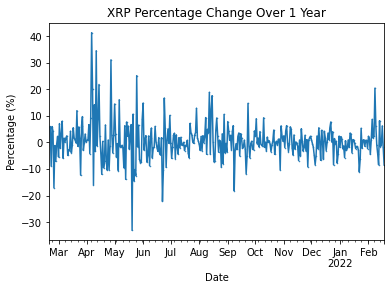

In [63]:
#XRP Chart and percent change
XRPPD=pd.read_csv(XRP, parse_dates=['timeOpen'], index_col=['timeOpen'])
XRPPD["PercentChange"]=XRPPD["open"]
XRPPD.PercentChange=XRPPD.PercentChange.pct_change()*100
ex=XRPPD['PercentChange'].plot( kind='line',marker='.',markersize=1,title='XRP Percentage Change Over 1 Year')
ex.set(xlabel='Date', ylabel='Percentage (%)')

In [53]:
#Merge all 5 coins Percent Change except BTC

fiveCoinsMerge = pd.DataFrame()  
fiveCoinsMerge.index = XRPPD.index
TableList=[CardanoPD, EthereumPD, MoneroPD, SolanaPD, XRPPD]

fiveCoinsMerge['table1'] = CardanoPD['PercentChange'].copy()
fiveCoinsMerge['table2'] = EthereumPD['PercentChange'].copy()
fiveCoinsMerge['table3'] = MoneroPD['PercentChange'].copy()
fiveCoinsMerge['table4'] = SolanaPD['PercentChange'].copy()
fiveCoinsMerge['table5'] = XRPPD['PercentChange'].copy()

fiveCoinsMerge['fiveCoinPercentChangeAvg'] = fiveCoinsMerge[['table1', 'table2','table3','table4', 'table5']].mean(axis=1)
#fiveCoinsMerge['percentChangeAvg'] = fiveCoinsMerge.mean(axis=1)

#fiveCoinsMerge.head()
fiveCoinsMerge['BitcoinPercentChangeAvg'] = BitcoinPD['PercentChange'].copy()



In [54]:
#checking the values are there
fiveCoinsMerge.head()
#BitcoinPD.head()



,table1,table2,table3,table4,table5,fiveCoinPercentChangeAvg,BitcoinPercentChangeAvg
timeOpen,,,,,,,
2021-02-19 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20 00:00:00+00:00,0.957122,0.599811,7.623269,27.204842,5.931688,8.463346,7.630087
2021-02-21 00:00:00+00:00,20.882571,-2.142451,-9.761563,-13.020407,-8.856955,-2.579761,0.284535
2021-02-22 00:00:00+00:00,-2.001682,0.763351,-3.357911,10.740167,5.960951,2.420975,2.492721
2021-02-23 00:00:00+00:00,-0.065223,-7.887069,-9.070419,30.349876,4.220562,3.509545,-5.705394


<AxesSubplot:title={'center':'Bitcoin vs. Alt Coin Average Percent Change '}, xlabel='BitcoinPercentChangeAvg', ylabel='fiveCoinPercentChangeAvg'>

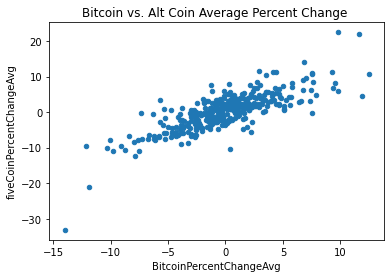

In [55]:
 fiveCoinsMerge.plot.scatter(
      x ='BitcoinPercentChangeAvg',
      y= 'fiveCoinPercentChangeAvg',
     title="Bitcoin vs. Alt Coin Average Percent Change "
 )

In [56]:
#covariance check
fiveCoinsMerge.corr()

,table1,table2,table3,table4,table5,fiveCoinPercentChangeAvg,BitcoinPercentChangeAvg
table1,1.000000,0.636525,0.624944,0.409724,0.615330,0.803572,0.640198
table2,0.636525,1.000000,0.689610,0.553875,0.655168,0.861572,0.804573
table3,0.624944,0.689610,1.000000,0.464546,0.590898,0.821195,0.716619
table4,0.409724,0.553875,0.464546,1.000000,0.385624,0.730486,0.446746
table5,0.615330,0.655168,0.590898,0.385624,1.000000,0.808065,0.653349
fiveCoinPercentChangeAvg,0.803572,0.861572,0.821195,0.730486,0.808065,1.000000,0.795452
BitcoinPercentChangeAvg,0.640198,0.804573,0.716619,0.446746,0.653349,0.795452,1.000000
